<a href="https://colab.research.google.com/github/jesusandresbaez/Presupuestos-egresos-Tehuacan/blob/master/Presupuesto_egresos_Tehuacan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Una vez que ya creamos nuestro dataframe, importamos nuestra base de datos y procedemos al análisis.

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from seaborn import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

###Descargamos nuestro dataset de los Presupuestos de egresos

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Marca Personal/Data Sicence/Presupuestos/Presupuestos de Egresos.xlsx')
df

,SERVICIOS PERSONALES,INVERSION PUBLICA,SERVICIOS GENERALES,MATERIALES Y SUMINISTROS,"TRANSFERENCIAS, ASIGNACIONES, SUBSIDIOS Y OTRAS AYUDAS","BIENES MUEBLES, INMUEBLES E INTANGIBLES",DEUDA PUBLICA,PERIODO
0,1.568134e+08,2.176149e+08,9.551470e+07,3.534702e+07,78343281.64,6489207.91,9034617.00,2013
1,1.677903e+08,2.471748e+08,8.979617e+07,3.782131e+07,50665265.54,14458888.90,11010072.38,2014
2,1.855217e+08,2.894151e+08,8.251052e+07,3.717440e+07,50680337.78,12406483.46,0.00,2015
3,2.057331e+08,2.062640e+08,9.340011e+07,6.845914e+07,27354433.00,21092742.00,0.00,2016
4,2.257884e+08,2.254211e+08,1.193521e+08,5.602976e+07,35549534.00,18606075.00,7437806.00,2017
5,2.705189e+08,1.961018e+08,1.305927e+08,7.382580e+07,48753138.86,41311632.08,8835000.00,2018
6,3.021012e+08,2.095761e+08,1.457281e+08,8.823156e+07,63076309.45,15571427.97,5800000.00,2019
7,3.150000e+08,2.108070e+08,1.531833e+08,7.511454e+07,66695074.13,31352691.39,0.00,2020
8,3.364387e+08,2.513444e+08,1.327414e+08,1.119857e+08,80697042.87,28984595.57,0.00,2021
9,3.605877e+08,2.264935e+08,1.626655e+08,7.682304e+07,92164201.48,31722671.46,0.00,2022


- Verificamos con que tipo de variables nos encontramos en nuestro dataframe y cambiamos el tipo de dato de la variable "PERIODO"

In [ ]:
df.dtypes

SERVICIOS PERSONALES                                       float64
INVERSION PUBLICA                                          float64
SERVICIOS GENERALES                                        float64
MATERIALES Y SUMINISTROS                                   float64
TRANSFERENCIAS, ASIGNACIONES, SUBSIDIOS Y OTRAS AYUDAS     float64
BIENES MUEBLES, INMUEBLES E INTANGIBLES                    float64
DEUDA PUBLICA                                              float64
PERIODO                                                      int64
dtype: object

- Cambiamos la variable "PERIODO" al tipo de dato objeto
- Aplicamos el formato a 2 decimales
- Cambiamos el formato para que las cantidades tengan separaciones con comas.

In [ ]:
#Cambiamos los tipos de valores por los que nos convenga
df[['PERIODO']]= df[['PERIODO']].astype(object)

#Para que python deje de mostrar las cantidades con  notación cientifica (E+08) y muestre solamente 2 decimales 
#aplicamos la siguiente sentencia, ej. 00000.00
pd.options.display.float_format = '{:.2f}'.format

#Aplicamos esta sentencia para darle formato a las cantidades tenga separación con comas ej. 0,000,00
pd.options.display.float_format = '{:,}'.format


###Creando la columna "Total" 

Vamos a crear una columna que nos de el total de la suma de todas las partidas por año para saber el monto total del presupuesto de egresos de cada año
- Crearemos una lista con el metodo list() y removeremos la variable "PERIODO" para no sumar  sus valores
- Aplicamos el metodo .sum() y sumamos las columnas que estan en nuestra lista 
- Al mismo tiempo creamos la columna "Total" donde se colocaran los valores creados de la suma

In [ ]:
#Creamos una lista con los indices 
col_total= list(df) #Generamos la lista
col_total.remove('PERIODO') #Quitamos algun indice que no quieramos que se sume

#Sumamos los valores por fila y cremos nuestra columna "Total"
df['Total'] = df[col_total].sum(axis=1) 
df

,SERVICIOS PERSONALES,INVERSION PUBLICA,SERVICIOS GENERALES,MATERIALES Y SUMINISTROS,"TRANSFERENCIAS, ASIGNACIONES, SUBSIDIOS Y OTRAS AYUDAS","BIENES MUEBLES, INMUEBLES E INTANGIBLES",DEUDA PUBLICA,PERIODO,Total
0,"156,813,398.59","217,614,947.96","95,514,700.93","35,347,019.77","78,343,281.64","6,489,207.91","9,034,617.0",2013,"599,157,173.8"
1,"167,790,336.49","247,174,765.0","89,796,167.47","37,821,311.15","50,665,265.54","14,458,888.9","11,010,072.38",2014,"618,716,806.93"
2,"185,521,654.45","289,415,059.9","82,510,517.37","37,174,400.79","50,680,337.78","12,406,483.46",0.0,2015,"657,708,453.75"
3,"205,733,125.0","206,263,974.0","93,400,108.0","68,459,142.0","27,354,433.0","21,092,742.0",0.0,2016,"622,303,524.0"
4,"225,788,381.0","225,421,094.0","119,352,104.0","56,029,762.0","35,549,534.0","18,606,075.0","7,437,806.0",2017,"688,184,756.0"
5,"270,518,851.5","196,101,843.3","130,592,733.4","73,825,795.88","48,753,138.86","41,311,632.08","8,835,000.0",2018,"769,938,995.0200001"
6,"302,101,248.3","209,576,088.8","145,728,077.2","88,231,563.28","63,076,309.45","15,571,427.97","5,800,000.0",2019,"830,084,715.0"
7,"315,000,000.0","210,807,000.0","153,183,349.1","75,114,544.34","66,695,074.13","31,352,691.39",0.0,2020,"852,152,658.96"
8,"336,438,704.0","251,344,396.1","132,741,365.2","111,985,654.1","80,697,042.87","28,984,595.57",0.0,2021,"942,191,757.8400002"
9,"360,587,699.2","226,493,467.3","162,665,522.6","76,823,041.05","92,164,201.48","31,722,671.46",0.0,2022,"950,456,603.09"


Vamos a crear "df_ab" un dataset con el "Total" de cada presupuesto pero dividido en 1 millón para abreviar las cantidades

- Creamos una lista con los indices de nuestro dataframe y quitamos al indice "PERIODO" para no afectar los valores
- Dividimos nuestra lista de indices del dataframe entre 1 millón para abreviar las cantidades.
- Agregamos nuevamente la columna de "PERIODO"

Tenemos nuestro dataframe con cantidades abreviadas


In [ ]:
cant_abreviada= list(df) #Generamos la lista
cant_abreviada.remove('PERIODO') #Quitamos el indice PERIODO para que no se sume

#Dividimos entre 1 millón el dataset
df_ab = df[cant_abreviada]/1000000

#Agregamos la columna "PERIODO"
df_ab['PERIODO'] = df['PERIODO']

#Redondeamos los decimales
df_ab = df_ab.round(2) 
df_ab

,SERVICIOS PERSONALES,INVERSION PUBLICA,SERVICIOS GENERALES,MATERIALES Y SUMINISTROS,"TRANSFERENCIAS, ASIGNACIONES, SUBSIDIOS Y OTRAS AYUDAS","BIENES MUEBLES, INMUEBLES E INTANGIBLES",DEUDA PUBLICA,Total,PERIODO
0,156.81,217.61,95.51,35.35,78.34,6.49,9.03,599.16,2013
1,167.79,247.17,89.8,37.82,50.67,14.46,11.01,618.72,2014
2,185.52,289.42,82.51,37.17,50.68,12.41,0.0,657.71,2015
3,205.73,206.26,93.4,68.46,27.35,21.09,0.0,622.3,2016
4,225.79,225.42,119.35,56.03,35.55,18.61,7.44,688.18,2017
5,270.52,196.1,130.59,73.83,48.75,41.31,8.84,769.94,2018
6,302.1,209.58,145.73,88.23,63.08,15.57,5.8,830.08,2019
7,315.0,210.81,153.18,75.11,66.7,31.35,0.0,852.15,2020
8,336.44,251.34,132.74,111.99,80.7,28.98,0.0,942.19,2021
9,360.59,226.49,162.67,76.82,92.16,31.72,0.0,950.46,2022


##Creación del Dataset de incrementos o decrementos porcentuales de las partidas por año



---



- Creamos un nuevo dataset llamado "df_transpose" de nuestro dataset original "df"
- Reemplazamos las cantidades que esten en ceros por NaN para no afectar las operaciones matematicas.
- Aplicamos el metodo transpose() para pasar nuestras columnas a filas y aplicar facilmente nuestras fórmulas


In [ ]:
#Creamos un nuevo dataset
df_transpose = df

#Reemplzamos ceros por NaN
df_transpose = df_transpose.replace(0.0, np.nan)

#Eliminamos la fila periodo
df_transpose = df_transpose.drop(['PERIODO'], axis = 1)

#Aplicamos metodo transpose()
df_transpose = df_transpose.transpose()
df_transpose

,0,1,2,3,4,5,6,7,8,9
SERVICIOS PERSONALES,"156,813,398.59","167,790,336.49","185,521,654.45","205,733,125.0","225,788,381.0","270,518,851.5","302,101,248.3","315,000,000.0","336,438,704.0","360,587,699.2"
INVERSION PUBLICA,"217,614,947.96","247,174,765.0","289,415,059.9","206,263,974.0","225,421,094.0","196,101,843.3","209,576,088.8","210,807,000.0","251,344,396.1","226,493,467.3"
SERVICIOS GENERALES,"95,514,700.93","89,796,167.47","82,510,517.37","93,400,108.0","119,352,104.0","130,592,733.4","145,728,077.2","153,183,349.1","132,741,365.2","162,665,522.6"
MATERIALES Y SUMINISTROS,"35,347,019.77","37,821,311.15","37,174,400.79","68,459,142.0","56,029,762.0","73,825,795.88","88,231,563.28","75,114,544.34","111,985,654.1","76,823,041.05"
"TRANSFERENCIAS, ASIGNACIONES, SUBSIDIOS Y OTRAS AYUDAS","78,343,281.64","50,665,265.54","50,680,337.78","27,354,433.0","35,549,534.0","48,753,138.86","63,076,309.45","66,695,074.13","80,697,042.87","92,164,201.48"
"BIENES MUEBLES, INMUEBLES E INTANGIBLES","6,489,207.91","14,458,888.9","12,406,483.46","21,092,742.0","18,606,075.0","41,311,632.08","15,571,427.97","31,352,691.39","28,984,595.57","31,722,671.46"
DEUDA PUBLICA,"9,034,617.0","11,010,072.38",NaN,NaN,"7,437,806.0","8,835,000.0","5,800,000.0",NaN,NaN,NaN
Total,"599,157,173.8","618,716,806.93","657,708,453.75","622,303,524.0","688,184,756.0","769,938,995.0200001","830,084,715.0","852,152,658.96","942,191,757.8400002","950,456,603.09"


Creamos nuetro dataset "df_porc_incr"

- Para saber el incremento o decremento porcentual respecto al año anterior utilizamos la formula siguiente:


(VALOR DEL AÑO SIGUIENTE / VALOR DEL AÑO ANTERIOR ) - 1 MENOS UNO


- En esta parte van a suceder 3 acciones: 
1. Creamos una columna con el nombre del año corresponidente
2. Aplicamos la formula y el valor obtenido se va a colocar en la columna correspondiente
3. Por último usamos "lambda" para aplicar a los valores creados el formato de de 2 digitos y que lleve el signo de porcentaje

Y obtenemos nuestro Dataset con los incremnetos o decrementos respecto al año anterior de las partidas del presupuesto de egresos del 2014 al 2022


In [ ]:
df_porc_incr = pd.DataFrame()

df_porc_incr['2014'] = ((df_transpose[1]/df_transpose[0])-1).apply(lambda x: format(x, '.2%'))
df_porc_incr['2015'] = ((df_transpose[2]/df_transpose[1])-1).apply(lambda x: format(x, '.2%'))
df_porc_incr['2016'] = ((df_transpose[3]/df_transpose[2])-1).apply(lambda x: format(x, '.2%'))
df_porc_incr['2017'] = ((df_transpose[4]/df_transpose[3])-1).apply(lambda x: format(x, '.2%'))
df_porc_incr['2018'] = ((df_transpose[5]/df_transpose[4])-1).apply(lambda x: format(x, '.2%'))
df_porc_incr['2019'] = ((df_transpose[6]/df_transpose[5])-1).apply(lambda x: format(x, '.2%'))
df_porc_incr['2020'] = ((df_transpose[7]/df_transpose[6])-1).apply(lambda x: format(x, '.2%'))
df_porc_incr['2021'] = ((df_transpose[8]/df_transpose[7])-1).apply(lambda x: format(x, '.2%'))
df_porc_incr['2022'] = ((df_transpose[9]/df_transpose[8])-1).apply(lambda x: format(x, '.2%'))

df_porc_incr

,2014,2015,2016,2017,2018,2019,2020,2021,2022
SERVICIOS PERSONALES,7.00%,10.57%,10.89%,9.75%,19.81%,11.67%,4.27%,6.81%,7.18%
INVERSION PUBLICA,13.58%,17.09%,-28.73%,9.29%,-13.01%,6.87%,0.59%,19.23%,-9.89%
SERVICIOS GENERALES,-5.99%,-8.11%,13.20%,27.79%,9.42%,11.59%,5.12%,-13.34%,22.54%
MATERIALES Y SUMINISTROS,7.00%,-1.71%,84.16%,-18.16%,31.76%,19.51%,-14.87%,49.09%,-31.40%
"TRANSFERENCIAS, ASIGNACIONES, SUBSIDIOS Y OTRAS AYUDAS",-35.33%,0.03%,-46.03%,29.96%,37.14%,29.38%,5.74%,20.99%,14.21%
"BIENES MUEBLES, INMUEBLES E INTANGIBLES",122.81%,-14.19%,70.01%,-11.79%,122.03%,-62.31%,101.35%,-7.55%,9.45%
DEUDA PUBLICA,21.87%,nan%,nan%,nan%,18.79%,-34.35%,nan%,nan%,nan%
Total,3.26%,6.30%,-5.38%,10.59%,11.88%,7.81%,2.66%,10.57%,0.88%


## Gráfica del "Total" de los Presupuestos de Egresos
##Creación y personalización de la gráfica lineal del monto total de los  presupuestos de egresos con sus incrementos o decrementos porcentuales

- Definimos en una variable por año el total de los montos de los presupuestos de egresos.
- Definimos los valores de la gráfica
- Aplicamos el texto que se va a mostrar en la gráfica

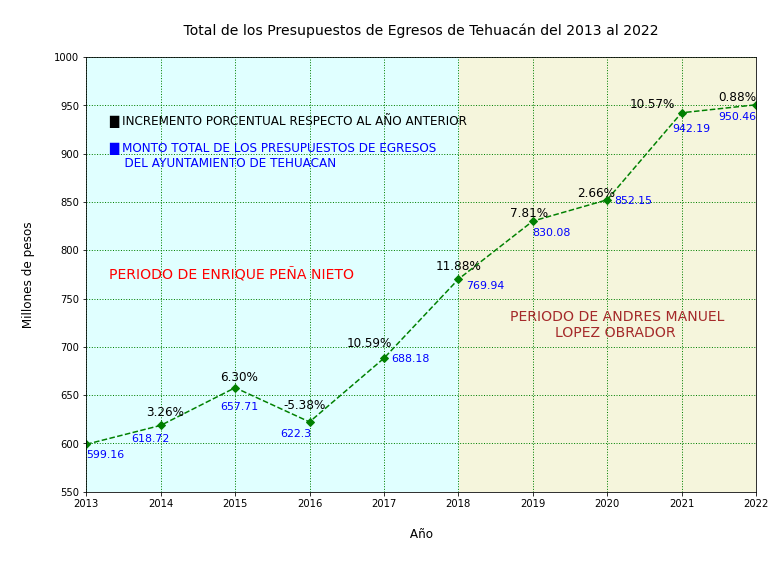

In [ ]:

#Parametros de la Grafica
plt.figure(figsize=(12,8))
plt.plot(df_ab['PERIODO'], df_ab['Total'], 'D--g')
plt.title('\n Total de los Presupuestos de Egresos de Tehuacán del 2013 al 2022 \n', size=14)
plt.xlabel('\n Año \n', size=12)
plt.ylabel('\n Millones de pesos \n', size=12)
plt.grid(color='g', linestyle='dotted', linewidth=1)
plt.xlim(2013,2022)
plt.ylim(550,1000)

#Fondos de color para dividir
x = [2018, 2018, 2022, 2022]
y = [1000, 551, 551 ,1000]
plt.fill(x,y, color='Beige')
a = [2013,2013,2018, 2018]
b = [1000, 551, 551 ,1000]
plt.fill(a,b, color='LightCyan')

#Texto que va en la gráfica
#Monto de los totales de los presupuestos
plt.text(2013, 585, df_ab.loc[0,'Total'] , fontsize=11, color='BLUE')
plt.text(2013.6, 602, df_ab.loc[1 ,'Total'], fontsize=11, color='BLUE')
plt.text(2014.8, 635, df_ab.loc[2 ,'Total'] , fontsize=11, color='BLUE')
plt.text(2015.6, 607, df_ab.loc[3 ,'Total'] , fontsize=11, color='BLUE')
plt.text(2017.1, 685, df_ab.loc[4 ,'Total'] , fontsize=11, color='BLUE') 
plt.text(2018.1, 760, df_ab.loc[5 ,'Total'] , fontsize=11, color='BLUE')
plt.text(2019, 815, df_ab.loc[6 ,'Total'] , fontsize=11, color='BLUE')
plt.text(2020.1, 848, df_ab.loc[7 ,'Total'] , fontsize=11, color='BLUE')
plt.text(2020.87, 923, df_ab.loc[8 ,'Total'] , fontsize=11, color='BLUE')
plt.text(2021.5, 935, df_ab.loc[9 ,'Total'] , fontsize=11, color='BLUE')

#Porcentajes de incrementos o decrementos de los totales de los presupuestos
plt.text(2013.8, 629, df_porc_incr.loc['Total', '2014'] , fontsize=12, color='black')
plt.text(2014.8, 665, df_porc_incr.loc['Total', '2015'] , fontsize=12, color='black')
plt.text(2015.65, 636, df_porc_incr.loc['Total', '2016'] , fontsize=12, color='black')
plt.text(2016.5, 700, df_porc_incr.loc['Total', '2017'] , fontsize=12, color='black')
plt.text(2017.7, 780, df_porc_incr.loc['Total', '2018'] , fontsize=12, color='black')
plt.text(2018.7, 835, df_porc_incr.loc['Total', '2019'] , fontsize=12, color='black')
plt.text(2019.6, 855, df_porc_incr.loc['Total', '2020'] , fontsize=12, color='black')
plt.text(2020.3, 947, df_porc_incr.loc['Total', '2021'] , fontsize=12, color='black')
plt.text(2021.5, 955, df_porc_incr.loc['Total', '2022'] , fontsize=12, color='black')

#Titulos
plt.text(2013.3, 930, '█ INCREMENTO PORCENTUAL RESPECTO AL AÑO ANTERIOR' , fontsize=12, color='blACK')
plt.text(2013.3, 770, 'PERIODO DE ENRIQUE PEÑA NIETO' , fontsize=14, color='red')
plt.text(2018.7, 710, 'PERIODO DE ANDRES MANUEL \n          LOPEZ OBRADOR' , fontsize=14, color='BROWN')
plt.text(2013.3, 886, '█ MONTO TOTAL DE LOS PRESUPUESTOS DE EGRESOS \n    DEL AYUNTAMIENTO DE TEHUACAN' , fontsize=12, color='BLUE')

plt.savefig("Comportamiento_presupuestos.jpg", dpi=300, bbox_inches='tight')
plt.show()

##Creando el Dataset del porcentaje que representa cada partida en los presupuestos de egresos del 2013 al 2022 


---

- Empezamos creando el dataset "df_porc_part" 
- En esta parte van a realizar 3 pasos al mismo tiempo
1. Vamos a crear a nuestra dataset la columna con el nombre de la partida abreviada
2. Creamos los valores para cada columna aplicando nuestra formula para sacar porcentajes 
- La formúla que no de el porcentaje que representa cada partida la vamos a obtener dividiendo los valores de las partidas entre el "Total" y multiplicamos por 1
3. A cada variable le aplicamos el formato de porcentajes

- Aplicamos el metodo transpose para cambiar nuestras columnas por filas
- Por último renombramos nuestros indices por los años que representan

Y ya tenemos nuestro Dataset de los porcentajes que representan cada partida en cada año de los presupuestos de egresos



In [ ]:
#Creamos nuestro dataset
df_porc_part = pd.DataFrame()

#Creamos columnas, generamos valores en porcentaje para la columna y aplicamos el formato de porcentaje
df_porc_part ['SP_porciento'] = ((df['SERVICIOS PERSONALES ']/df['Total'])*1).apply(lambda x: format(x, '.2%'))
df_porc_part ['IP_porciento'] = ((df['INVERSION PUBLICA ']/df['Total'])*1).apply(lambda x: format(x, '.2%'))
df_porc_part ['SG_porciento'] = ((df['SERVICIOS GENERALES ']/df['Total'])*1).apply(lambda x: format(x, '.2%'))
df_porc_part ['MYS_porciento'] = ((df['MATERIALES Y SUMINISTROS ']/df['Total'])*1).apply(lambda x: format(x, '.2%'))
df_porc_part ['TASYOA_porciento'] = ((df['TRANSFERENCIAS, ASIGNACIONES, SUBSIDIOS Y OTRAS AYUDAS ']/df['Total'])*1).apply(lambda x: format(x, '.2%'))
df_porc_part ['BMIEI_porciento'] = ((df['BIENES MUEBLES, INMUEBLES E INTANGIBLES ']/df['Total'])*1).apply(lambda x: format(x, '.2%'))
df_porc_part ['DP_porciento'] = ((df['DEUDA PUBLICA ']/df['Total'])*1).apply(lambda x: format(x, '.2%'))

#Le aplicamos el metodo .Transpose()
df_porc_part = df_porc_part.transpose()

#Asignamos los nombres de nuestras columnas
df_porc_part.columns = ['2013', '2014','2015','2016','2017','2018','2019','2020','2021','2022']

df_porc_part

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
SP_porciento,26.17%,27.12%,28.21%,33.06%,32.81%,35.14%,36.39%,36.97%,35.71%,37.94%
IP_porciento,36.32%,39.95%,44.00%,33.15%,32.76%,25.47%,25.25%,24.74%,26.68%,23.83%
SG_porciento,15.94%,14.51%,12.55%,15.01%,17.34%,16.96%,17.56%,17.98%,14.09%,17.11%
MYS_porciento,5.90%,6.11%,5.65%,11.00%,8.14%,9.59%,10.63%,8.81%,11.89%,8.08%
TASYOA_porciento,13.08%,8.19%,7.71%,4.40%,5.17%,6.33%,7.60%,7.83%,8.56%,9.70%
BMIEI_porciento,1.08%,2.34%,1.89%,3.39%,2.70%,5.37%,1.88%,3.68%,3.08%,3.34%
DP_porciento,1.51%,1.78%,0.00%,0.00%,1.08%,1.15%,0.70%,0.00%,0.00%,0.00%


##Creando grafica de comportamiento de partidas de los presupuestos

Vamos a crear un dataset de los mismos valores del dataset de "df_ab" porque es nuestro set de datos que ya abreviamos para no poner cantidades con muchos digitos

In [ ]:
#Creamos nuestro Dataset 
df_graf_line = df_ab

#Eliminamos la columna que no necesitamos
df_graf_line = df_graf_line.drop(['Total'], axis = 1)


##Creando Gráfica de comportamientos de las partidas de los presupuestos de egresos

- Definimos los valores de nuestra gráfica de lineas
- Colocamos el titulo y sus atributos
- Detallamos la personalización de nuestra gráfica
- Insertamos datos explicativos
- Creamos nuestra gráfica como imagén 

Tenemos nuestra gráfica con los comportamientos que han tenido cada variable

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:107: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.


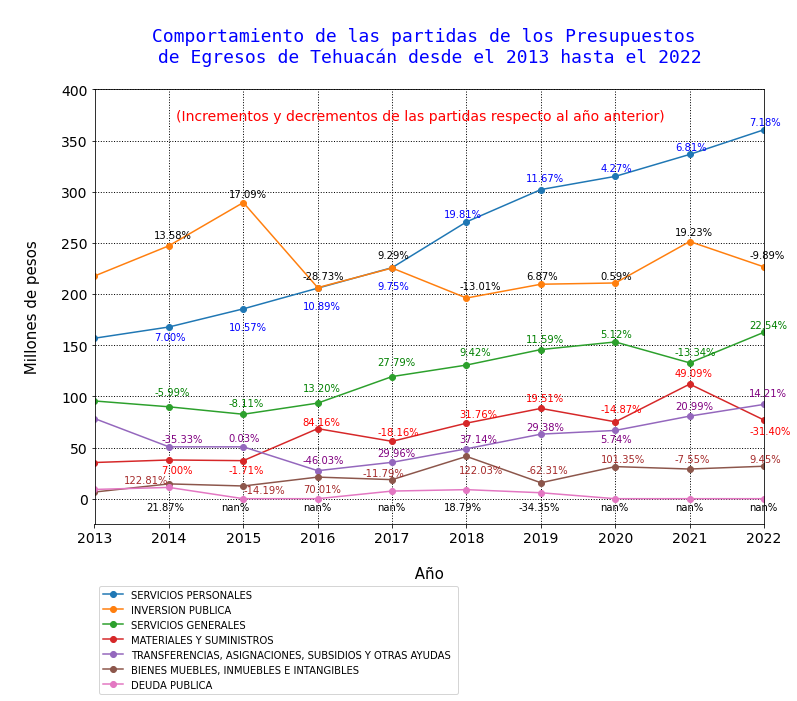

In [ ]:

#Definimos valores para la gráfica
df_graf_line.plot(kind="line", 
        x='PERIODO',
        figsize=(12,8), marker = 'o')

#Parametros para el titulo

plt.title("\n Comportamiento de las partidas de los Presupuestos  \n de Egresos de Tehuacán desde el 2013 hasta el 2022 \n ",
          fontdict={'family': 'monospace', 
                    'color' : 'blue',
                    'size': 18},
          loc='center')

#Parametros personalizables de la grafica

plt.legend(bbox_to_anchor=(0.55,-0.13))
plt.ylabel("\n Millones de pesos \n", fontsize=15)
plt.xlabel("\n Año \n", fontsize=15)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim( -25, 400) #Delimitadores de eje "x"
plt.xlim(2013, 2022) #Delimitadores de eje "x"
plt.grid( color='black', linestyle='dotted', linewidth=1)#Parametros para lineas (axis='y' para poner solo lineas verticales)
plt.text(2014.1, 370, '(Incrementos y decrementos de las partidas respecto al año anterior)' , fontsize=14, color='red')

#SERVICOS PERSONALES

plt.text(2013.8, 155, df_porc_incr.loc['SERVICIOS PERSONALES ', '2014'] , fontsize=10, color='b')
plt.text(2014.8, 165, df_porc_incr.loc['SERVICIOS PERSONALES ', '2015'] , fontsize=10, color='b')
plt.text(2015.8, 185, df_porc_incr.loc['SERVICIOS PERSONALES ', '2016'] , fontsize=10, color='b')
plt.text(2016.8, 205, df_porc_incr.loc['SERVICIOS PERSONALES ', '2017'] , fontsize=10, color='b')
plt.text(2017.7, 275, df_porc_incr.loc['SERVICIOS PERSONALES ', '2018'] , fontsize=10, color='b')
plt.text(2018.8, 310, df_porc_incr.loc['SERVICIOS PERSONALES ', '2019'] , fontsize=10, color='b')
plt.text(2019.8, 320, df_porc_incr.loc['SERVICIOS PERSONALES ', '2020'] , fontsize=10, color='b')
plt.text(2020.8, 341, df_porc_incr.loc['SERVICIOS PERSONALES ', '2021'] , fontsize=10, color='b')
plt.text(2021.8, 365, df_porc_incr.loc['SERVICIOS PERSONALES ', '2022'] , fontsize=10, color='b')

#INVERSION PUBLICA
plt.text(2013.8, 255, df_porc_incr.loc['INVERSION PUBLICA ', '2014'] , fontsize=10, color='black')
plt.text(2014.8, 295, df_porc_incr.loc['INVERSION PUBLICA ', '2015'] , fontsize=10, color='black')
plt.text(2015.8, 215, df_porc_incr.loc['INVERSION PUBLICA ', '2016'] , fontsize=10, color='black')
plt.text(2016.8, 235, df_porc_incr.loc['INVERSION PUBLICA ', '2017'] , fontsize=10, color='black')
plt.text(2017.9, 205, df_porc_incr.loc['INVERSION PUBLICA ', '2018'] , fontsize=10, color='black')
plt.text(2018.8, 215, df_porc_incr.loc['INVERSION PUBLICA ', '2019'] , fontsize=10, color='black')
plt.text(2019.8, 215, df_porc_incr.loc['INVERSION PUBLICA ', '2020'] , fontsize=10, color='black')
plt.text(2020.8, 258, df_porc_incr.loc['INVERSION PUBLICA ', '2021'] , fontsize=10, color='black')
plt.text(2021.8, 235, df_porc_incr.loc['INVERSION PUBLICA ', '2022'] , fontsize=10, color='black')

#SERVICIOS GENERALES
plt.text(2013.8, 101, df_porc_incr.loc['SERVICIOS GENERALES ', '2014'] , fontsize=10, color='G')
plt.text(2014.8, 90, df_porc_incr.loc['SERVICIOS GENERALES ', '2015'] , fontsize=10, color='G')
plt.text(2015.8, 105, df_porc_incr.loc['SERVICIOS GENERALES ', '2016'] , fontsize=10, color='G')
plt.text(2016.8, 130, df_porc_incr.loc['SERVICIOS GENERALES ', '2017'] , fontsize=10, color='G')
plt.text(2017.9, 140, df_porc_incr.loc['SERVICIOS GENERALES ', '2018'] , fontsize=10, color='G')
plt.text(2018.8, 153, df_porc_incr.loc['SERVICIOS GENERALES ', '2019'] , fontsize=10, color='G')
plt.text(2019.8, 158, df_porc_incr.loc['SERVICIOS GENERALES ', '2020'] , fontsize=10, color='G')
plt.text(2020.8, 140, df_porc_incr.loc['SERVICIOS GENERALES ', '2021'] , fontsize=10, color='G')
plt.text(2021.8, 167, df_porc_incr.loc['SERVICIOS GENERALES ', '2022'] , fontsize=10, color='G')

#MATERIALES Y SUMINISTROS
plt.text(2013.9, 25, df_porc_incr.loc['MATERIALES Y SUMINISTROS ', '2014'] , fontsize=10, color='R')
plt.text(2014.8, 25, df_porc_incr.loc['MATERIALES Y SUMINISTROS ', '2015'] , fontsize=10, color='R')
plt.text(2015.8, 72, df_porc_incr.loc['MATERIALES Y SUMINISTROS ', '2016'] , fontsize=10, color='R')
plt.text(2016.8, 62, df_porc_incr.loc['MATERIALES Y SUMINISTROS ', '2017'] , fontsize=10, color='R')
plt.text(2017.9, 80, df_porc_incr.loc['MATERIALES Y SUMINISTROS ', '2018'] , fontsize=10, color='R')
plt.text(2018.8, 95, df_porc_incr.loc['MATERIALES Y SUMINISTROS ', '2019'] , fontsize=10, color='R')
plt.text(2019.8, 85, df_porc_incr.loc['MATERIALES Y SUMINISTROS ', '2020'] , fontsize=10, color='R')
plt.text(2020.8, 120, df_porc_incr.loc['MATERIALES Y SUMINISTROS ', '2021'] , fontsize=10, color='R')
plt.text(2021.8, 63, df_porc_incr.loc['MATERIALES Y SUMINISTROS ', '2022'] , fontsize=10, color='R')

#TRANSFERENCIAS
plt.text(2013.9, 55, df_porc_incr.loc['TRANSFERENCIAS, ASIGNACIONES, SUBSIDIOS Y OTRAS AYUDAS ', '2014'] , fontsize=10, color='PURPLE')
plt.text(2014.8, 56, df_porc_incr.loc['TRANSFERENCIAS, ASIGNACIONES, SUBSIDIOS Y OTRAS AYUDAS ', '2015'] , fontsize=10, color='PURPLE')
plt.text(2015.8, 35, df_porc_incr.loc['TRANSFERENCIAS, ASIGNACIONES, SUBSIDIOS Y OTRAS AYUDAS ', '2016'] , fontsize=10, color='PURPLE')
plt.text(2016.8, 41.5, df_porc_incr.loc['TRANSFERENCIAS, ASIGNACIONES, SUBSIDIOS Y OTRAS AYUDAS ', '2017'] , fontsize=10, color='PURPLE')

plt.text(2017.9, 55, df_porc_incr.loc['TRANSFERENCIAS, ASIGNACIONES, SUBSIDIOS Y OTRAS AYUDAS ', '2018'] , fontsize=10, color='PURPLE')
plt.text(2018.8, 67, df_porc_incr.loc['TRANSFERENCIAS, ASIGNACIONES, SUBSIDIOS Y OTRAS AYUDAS ', '2019'] , fontsize=10, color='PURPLE')
plt.text(2019.8, 55, df_porc_incr.loc['TRANSFERENCIAS, ASIGNACIONES, SUBSIDIOS Y OTRAS AYUDAS ', '2020'] , fontsize=10, color='PURPLE')
plt.text(2020.8, 87, df_porc_incr.loc['TRANSFERENCIAS, ASIGNACIONES, SUBSIDIOS Y OTRAS AYUDAS ', '2021'] , fontsize=10, color='PURPLE')
plt.text(2021.8, 100, df_porc_incr.loc['TRANSFERENCIAS, ASIGNACIONES, SUBSIDIOS Y OTRAS AYUDAS ', '2022'] , fontsize=10, color='PURPLE')

#MATERIALES Y SUMINISTROS
plt.text(2013.4, 15, df_porc_incr.loc['BIENES MUEBLES, INMUEBLES E INTANGIBLES ', '2014'] , fontsize=10, color='BROWN')
plt.text(2015, 5, df_porc_incr.loc['BIENES MUEBLES, INMUEBLES E INTANGIBLES ', '2015'] , fontsize=10, color='BROWN')
plt.text(2015.8, 6, df_porc_incr.loc['BIENES MUEBLES, INMUEBLES E INTANGIBLES ', '2016'] , fontsize=10, color='BROWN')
plt.text(2016.6, 22, df_porc_incr.loc['BIENES MUEBLES, INMUEBLES E INTANGIBLES ', '2017'] , fontsize=10, color='BROWN')

plt.text(2017.9, 25, df_porc_incr.loc['BIENES MUEBLES, INMUEBLES E INTANGIBLES ', '2018'] , fontsize=10, color='BROWN')
plt.text(2018.8, 25, df_porc_incr.loc['BIENES MUEBLES, INMUEBLES E INTANGIBLES ', '2019'] , fontsize=10, color='BROWN')
plt.text(2019.8, 36, df_porc_incr.loc['BIENES MUEBLES, INMUEBLES E INTANGIBLES ', '2020'] , fontsize=10, color='BROWN')
plt.text(2020.8, 36, df_porc_incr.loc['BIENES MUEBLES, INMUEBLES E INTANGIBLES ', '2021'] , fontsize=10, color='BROWN')
plt.text(2021.8, 36, df_porc_incr.loc['BIENES MUEBLES, INMUEBLES E INTANGIBLES ', '2022'] , fontsize=10, color='BROWN')

#DEUDA PUBLICA
plt.text(2013.7, -11, df_porc_incr.loc['DEUDA PUBLICA ', '2014'] , fontsize=10, color='BLACK')
plt.text(2014.7, -11, df_porc_incr.loc['DEUDA PUBLICA ', '2015'] , fontsize=10, color='BLACK')
plt.text(2015.8, -11, df_porc_incr.loc['DEUDA PUBLICA ', '2016'] , fontsize=10, color='BLACK')
plt.text(2016.8, -11, df_porc_incr.loc['DEUDA PUBLICA ', '2017'] , fontsize=10, color='BLACK')
plt.text(2017.7, -11, df_porc_incr.loc['DEUDA PUBLICA ', '2018'] , fontsize=10, color='BLACK')
plt.text(2018.7, -11, df_porc_incr.loc['DEUDA PUBLICA ', '2019'] , fontsize=10, color='BLACK')
plt.text(2019.8, -11, df_porc_incr.loc['DEUDA PUBLICA ', '2020'] , fontsize=10, color='BLACK')
plt.text(2020.8, -11, df_porc_incr.loc['DEUDA PUBLICA ', '2021'] , fontsize=10, color='BLACK')
plt.text(2021.8, -11, df_porc_incr.loc['DEUDA PUBLICA ', '2022'] , fontsize=10, color='BLACK')

plt.savefig("Increm_por_partida.jpg", dpi=300, bbox_inches='tight')
plt.show()

##Creación de gráfica de barras comparando los años 2015 y 2016 de los presupuestos de egresos

Creamos nuestro Dataset

- Llamamos las series de datos del 2015 y 2016 y posteriormente las concatenamos

In [ ]:
#Llamamos los valores de las partidas del 2016 de nuestro dataset df_ab
df_16 = df_ab[df_ab['PERIODO'] == 2016] 

#Eliminamos la columna que no necesitamos mostrar en la grafica
df_16 = df_16.drop([ 'Total'], axis=1) 

#Llamamos los valores de las partidas del 2016 de nuestro dataset df_ab
df_15 = df_ab[df_ab['PERIODO'] == 2015] 

#Eliminamos la columna que no necesitamos mostrar en la grafica
df_15 = df_15.drop(['Total'], axis=1) #Eliminamos la columna que no necesitamos mostrar enla grafica

#Concatenamos las series del 2016 y 2015
comparaciones_15_16 = pd.concat([df_15,df_16], axis=0)#Concatenamos los dataframes
comparaciones_15_16 

,SERVICIOS PERSONALES,INVERSION PUBLICA,SERVICIOS GENERALES,MATERIALES Y SUMINISTROS,"TRANSFERENCIAS, ASIGNACIONES, SUBSIDIOS Y OTRAS AYUDAS","BIENES MUEBLES, INMUEBLES E INTANGIBLES",DEUDA PUBLICA,PERIODO
2,185.52,289.42,82.51,37.17,50.68,12.41,0.0,2015
3,205.73,206.26,93.4,68.46,27.35,21.09,0.0,2016


##Creando Gráfica de comparación del 2015 y 2016

- Aplicamos los parametros de la gráfica
- Configuramos el título
- Aplicamos etiquetas
- Insertamos valores

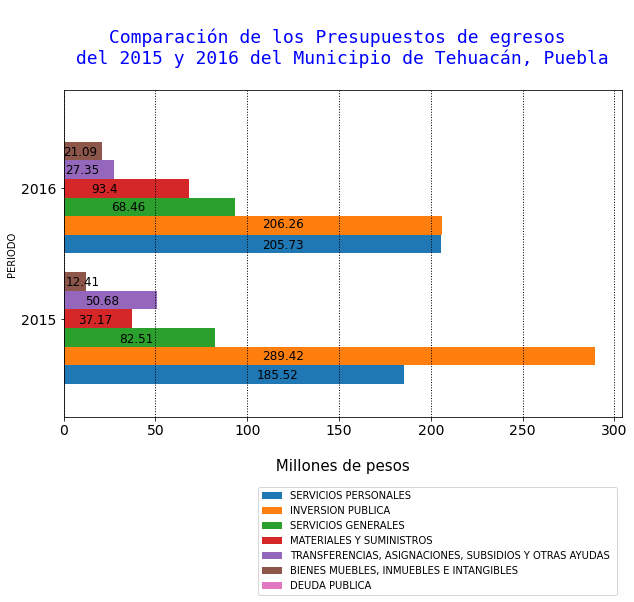

In [ ]:
#Parametros de ls gráfica
comparaciones_15_16.plot(kind="barh", 
        x= 'PERIODO', 
           width = 1, 
           figsize=(10,6)
           )
#Parametros para el titulo
plt.title("\n Comparación de los Presupuestos de egresos  \n del 2015 y 2016 del Municipio de Tehuacán, Puebla \n", 
          fontdict={'family': 'monospace', 
                    'color' : 'blue',
                    'size': 18},
          loc='center')
plt.grid(axis='x', color='black', linestyle='dotted', linewidth=1)

#Parametros personalizables de la grafica
plt.legend(bbox_to_anchor=(1,-0.2)) #Leyenda de la gráfica
plt.xlabel("\n Millones de pesos ", fontsize=15)
plt.xticks(rotation=0, fontsize=14)#Parametrtos personalizables del eje x
plt.yticks(fontsize=14)#Parametrtos personalizables del eje y

#Parametros de textos
plt.text(105, -0.46, df_ab.loc[2, 'SERVICIOS PERSONALES '] , fontsize=12, color='black')
plt.text(108, -0.31, df_ab.loc[2,'INVERSION PUBLICA '] , fontsize=12, color='black')
plt.text(30, -0.18, df_ab.loc[2, 'SERVICIOS GENERALES '] , fontsize=12, color='black')
plt.text(8, -0.04, df_ab.loc[2, 'MATERIALES Y SUMINISTROS '] , fontsize=12, color='black')
plt.text(12, 0.11, df_ab.loc[2, 'TRANSFERENCIAS, ASIGNACIONES, SUBSIDIOS Y OTRAS AYUDAS '] , fontsize=12, color='black')
plt.text(1, 0.25, df_ab.loc[2, 'BIENES MUEBLES, INMUEBLES E INTANGIBLES '] , fontsize=12, color='BLACK')

#Parametros de textos
plt.text(0, 1.25, df_ab.loc[3, 'BIENES MUEBLES, INMUEBLES E INTANGIBLES '] , fontsize=12, color='black')
plt.text(1, 1.11, df_ab.loc[3, 'TRANSFERENCIAS, ASIGNACIONES, SUBSIDIOS Y OTRAS AYUDAS '] , fontsize=12, color='black')
plt.text(15, .97, df_ab.loc[3, 'SERVICIOS GENERALES '] , fontsize=12, color='black')
plt.text(26, 0.83, df_ab.loc[3, 'MATERIALES Y SUMINISTROS '] , fontsize=12, color='black')
plt.text(108, .70, df_ab.loc[3,'INVERSION PUBLICA '] , fontsize=12, color='black')
plt.text(108, .54, df_ab.loc[3, 'SERVICIOS PERSONALES '] , fontsize=12, color='black')


plt.show()

## Creando la gráfica de barras apiladas de porcentajes correspondientes de las partidas por presupuesto 

Creamos un Dataset con el nombre de partidas que contendra únicamente las partidas que necesitamos para hacer una gráfica de barras apiladas

In [ ]:
#Creamos un dataframe con las cantidades divididas en un millón para mostrar las cantidades con menos digitos  
partidas =  df_ab[['SERVICIOS PERSONALES ', 'INVERSION PUBLICA ', 'SERVICIOS GENERALES ',  'MATERIALES Y SUMINISTROS ',
 'TRANSFERENCIAS, ASIGNACIONES, SUBSIDIOS Y OTRAS AYUDAS ',
 'BIENES MUEBLES, INMUEBLES E INTANGIBLES ',
 'DEUDA PUBLICA ', 'PERIODO']] 


- Aplicamos los parametros de la gráfica con nuestro Dataset creado
- Configuramos el título
- Aplicamos etiquetas
- Insertamos valores

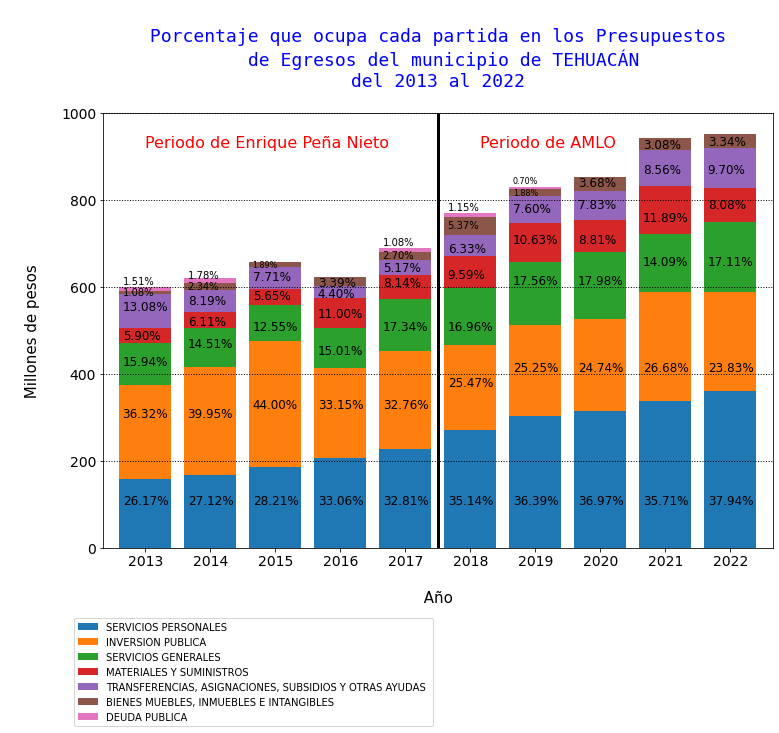

In [ ]:
#Parametros de la grafica
partidas.plot(kind="bar", 
        x= "PERIODO", 
        stacked=True, 
        width = 0.8, 
        figsize=(12,8),
        )
#Parametros para el titulo
plt.title("\n Porcentaje que ocupa cada partida en los Presupuestos \n de Egresos del municipio de TEHUACÁN\n del 2013 al 2022 \n", 
          fontdict={'family': 'monospace', 
                    'color' : 'blue',
                    #'weight': 'Bold',
                    'size': 18},
          loc='center')

#Parametros personalizables de la grafica
plt.legend(bbox_to_anchor=(.5,-.15)) #Leyenda de la gráfica
plt.ylabel("\n Millones de pesos \n", fontsize=15)
plt.xlabel("\n Año \n", fontsize=15)#Parametrtos personalizables del eje x
plt.xticks(rotation=0, fontsize=14)#Parametrtos personalizables del eje x
plt.yticks(fontsize=14)#Parametrtos personalizables del eje y
plt.ylim(0,1000)# Delimitadores de eje "y"
plt.grid(axis='y', color='black', linestyle='dotted', linewidth=1)

#Proporciones de porcentaje x año
plt.text(-.35, 100, df_porc_part.loc['SP_porciento', '2013'] , fontsize=12, color='black')
plt.text(0.65, 100, df_porc_part.loc['SP_porciento', '2014'] , fontsize=12, color='black')
plt.text(1.65, 100, df_porc_part.loc['SP_porciento', '2015'] , fontsize=12, color='black')
plt.text(2.65, 100, df_porc_part.loc['SP_porciento', '2016'] , fontsize=12, color='black')
plt.text(3.65, 100, df_porc_part.loc['SP_porciento', '2017'] , fontsize=12, color='black')
plt.text(4.65, 100, df_porc_part.loc['SP_porciento', '2018'] , fontsize=12, color='black')
plt.text(5.65, 100, df_porc_part.loc['SP_porciento', '2019'] , fontsize=12, color='black')
plt.text(6.65, 100, df_porc_part.loc['SP_porciento', '2020'] , fontsize=12, color='black')
plt.text(7.65, 100, df_porc_part.loc['SP_porciento', '2021'] , fontsize=12, color='black')
plt.text(8.65, 100, df_porc_part.loc['SP_porciento', '2022'] , fontsize=12, color='black')

plt.text(-.35, 300, df_porc_part.loc['IP_porciento', '2013'] , fontsize=12, color='black')
plt.text(0.65, 300, df_porc_part.loc['IP_porciento', '2014'] , fontsize=12, color='black')
plt.text(1.65, 320, df_porc_part.loc['IP_porciento', '2015'] , fontsize=12, color='black')
plt.text(2.65, 320, df_porc_part.loc['IP_porciento', '2016'] , fontsize=12, color='black')
plt.text(3.65, 320, df_porc_part.loc['IP_porciento', '2017'] , fontsize=12, color='black')
plt.text(4.65, 370, df_porc_part.loc['IP_porciento', '2018'] , fontsize=12, color='black')
plt.text(5.65, 405, df_porc_part.loc['IP_porciento', '2019'] , fontsize=12, color='black')
plt.text(6.65, 405, df_porc_part.loc['IP_porciento', '2020'] , fontsize=12, color='black')
plt.text(7.65, 405, df_porc_part.loc['IP_porciento', '2021'] , fontsize=12, color='black')
plt.text(8.65, 405, df_porc_part.loc['IP_porciento', '2022'] , fontsize=12, color='black')

plt.text(-.35, 420, df_porc_part.loc['SG_porciento', '2013'] , fontsize=12, color='black')
plt.text(0.65, 460, df_porc_part.loc['SG_porciento', '2014'] , fontsize=12, color='black')
plt.text(1.65, 500, df_porc_part.loc['SG_porciento', '2015'] , fontsize=12, color='black')
plt.text(2.65, 445, df_porc_part.loc['SG_porciento', '2016'] , fontsize=12, color='black')
plt.text(3.65, 500, df_porc_part.loc['SG_porciento', '2017'] , fontsize=12, color='black')
plt.text(4.65, 500, df_porc_part.loc['SG_porciento', '2018'] , fontsize=12, color='black')
plt.text(5.65, 605, df_porc_part.loc['SG_porciento', '2019'] , fontsize=12, color='black')
plt.text(6.65, 605, df_porc_part.loc['SG_porciento', '2020'] , fontsize=12, color='black')
plt.text(7.65, 650, df_porc_part.loc['SG_porciento', '2021'] , fontsize=12, color='black')
plt.text(8.65, 650, df_porc_part.loc['SG_porciento', '2022'] , fontsize=12, color='black')

plt.text(-.35, 480, df_porc_part.loc['MYS_porciento', '2013'] , fontsize=12, color='black')
plt.text(0.65, 510, df_porc_part.loc['MYS_porciento', '2014'] , fontsize=12, color='black')
plt.text(1.65, 570, df_porc_part.loc['MYS_porciento', '2015'] , fontsize=12, color='black')
plt.text(2.65, 530, df_porc_part.loc['MYS_porciento', '2016'] , fontsize=12, color='black')
plt.text(3.65, 600, df_porc_part.loc['MYS_porciento', '2017'] , fontsize=12, color='black')
plt.text(4.65, 620, df_porc_part.loc['MYS_porciento', '2018'] , fontsize=12, color='black')
plt.text(5.65, 700, df_porc_part.loc['MYS_porciento', '2019'] , fontsize=12, color='black')
plt.text(6.65, 700, df_porc_part.loc['MYS_porciento', '2020'] , fontsize=12, color='black')
plt.text(7.65, 750, df_porc_part.loc['MYS_porciento', '2021'] , fontsize=12, color='black')
plt.text(8.65, 780, df_porc_part.loc['MYS_porciento', '2022'] , fontsize=12, color='black')

plt.text(-.35, 545, df_porc_part.loc['TASYOA_porciento', '2013'] , fontsize=12, color='black')
plt.text(0.65, 560, df_porc_part.loc['TASYOA_porciento', '2014'] , fontsize=12, color='black')
plt.text(1.65, 615, df_porc_part.loc['TASYOA_porciento', '2015'] , fontsize=12, color='black')
plt.text(2.65, 575, df_porc_part.loc['TASYOA_porciento', '2016'] , fontsize=12, color='black')
plt.text(3.65, 635, df_porc_part.loc['TASYOA_porciento', '2017'] , fontsize=12, color='black')
plt.text(4.65, 680, df_porc_part.loc['TASYOA_porciento', '2018'] , fontsize=12, color='black')
plt.text(5.65, 770, df_porc_part.loc['TASYOA_porciento', '2019'] , fontsize=12, color='black')
plt.text(6.65, 780, df_porc_part.loc['TASYOA_porciento', '2020'] , fontsize=12, color='black')
plt.text(7.65, 860, df_porc_part.loc['TASYOA_porciento', '2021'] , fontsize=12, color='black')
plt.text(8.65, 860, df_porc_part.loc['TASYOA_porciento', '2022'] , fontsize=12, color='black')

plt.text(-.35, 580, df_porc_part.loc['BMIEI_porciento', '2013'] , fontsize=10, color='black')
plt.text(0.65, 595, df_porc_part.loc['BMIEI_porciento', '2014'] , fontsize=10, color='black')
plt.text(1.65, 645, df_porc_part.loc['BMIEI_porciento', '2015'] , fontsize=8, color='black')
plt.text(2.65, 600, df_porc_part.loc['BMIEI_porciento', '2016'] , fontsize=12, color='black')
plt.text(3.65, 665, df_porc_part.loc['BMIEI_porciento', '2017'] , fontsize=10, color='black')
plt.text(4.65, 735, df_porc_part.loc['BMIEI_porciento', '2018'] , fontsize=10, color='black')
plt.text(5.65, 810, df_porc_part.loc['BMIEI_porciento', '2019'] , fontsize=8, color='black')
plt.text(6.65, 830, df_porc_part.loc['BMIEI_porciento', '2020'] , fontsize=12, color='black')
plt.text(7.65, 918, df_porc_part.loc['BMIEI_porciento', '2021'] , fontsize=12, color='black')
plt.text(8.65, 925, df_porc_part.loc['BMIEI_porciento', '2022'] , fontsize=12, color='black')

plt.text(-.35, 605, df_porc_part.loc['DP_porciento', '2013'] , fontsize=10, color='black')
plt.text(0.65, 620, df_porc_part.loc['DP_porciento', '2014'] , fontsize=10, color='black')
plt.text(3.65, 695, df_porc_part.loc['DP_porciento', '2017'] , fontsize=10, color='black')
plt.text(4.65, 775, df_porc_part.loc['DP_porciento', '2018'] , fontsize=10, color='black')
plt.text(5.65, 837, df_porc_part.loc['DP_porciento', '2019'] , fontsize=8, color='black')

plt.text(0, 920, 'Periodo de Enrique Peña Nieto', fontsize=16, color='red')
plt.text(5.15, 920, 'Periodo de AMLO', fontsize=16, color='red')


plt.vlines(x=4.50, ymin=0, ymax=1000, color='black', linewidth=3)
plt.savefig("df_porc_part_por_presupuestos.jpg", dpi=200, bbox_inches='tight')
plt.show()

##Creando una Gráfica comparativa de barras de las partidas de los presupuestos de egresos

- Aplicamos los parametros de la gráfica
- Configuramos el título
- Aplicamos etiquetas
- Insertamos valores

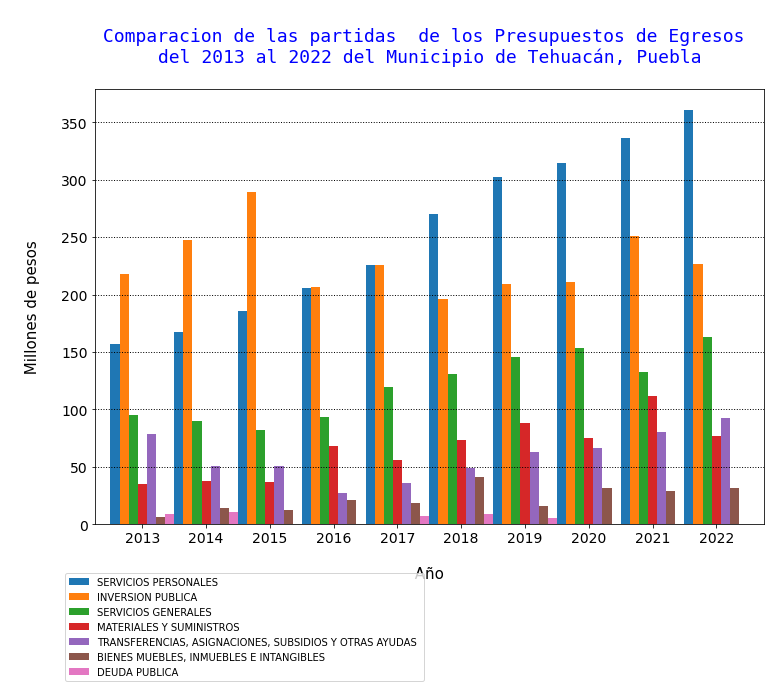

In [ ]:
#Definimos valores de la Gráfica
partidas.plot(kind="bar", 
        x='PERIODO', 
        #stacked=True, #Sirve para apilar las barras
        width = 1, #Grosor de las barras 
        figsize=(12,8) 
        )

#Parametros para el titulo
plt.title("\n Comparacion de las partidas  de los Presupuestos de Egresos  \n del 2013 al 2022 del Municipio de Tehuacán, Puebla \n", 
          fontdict={'family': 'monospace', 
                    'color' : 'blue',
                    #'weight': 'Bold',
                    'size': 18},
          loc='center')

#Parametros personalizables de la grafica
plt.legend(bbox_to_anchor=(0.5,-.1))
plt.ylabel("\n Millones de pesos \n", fontsize=15)
plt.xlabel("\n Año \n", fontsize=15)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
#plt.xlim(100, 1000) #Delimitadores de eje "x"
plt.grid(axis='y', color='black', linestyle='dotted', linewidth=1)#Parametros para lineas (axis='y' para poner solo lineas verticales)

plt.savefig("Graf_barras_partidas.jpg", dpi=300, bbox_inches='tight')
plt.show()

## Creando la Gráfica de Datos Económicos

- Empezamos por crear el dataset
- Al mismo tiempo eliminamos la columna que no necesitamos

In [ ]:
datos_economicos = pd.read_excel('/content/drive/MyDrive/Marca Personal/Data Sicence/Presupuestos/Presupuesto 18-22.xlsx', sheet_name='Datos-Econ')
datos_economicos

,Dolar,Sal_min,Inflacion,tasa_Des,Gasolina,PIB,Año
0,12.74,76.95,3.8,4.9,12.13,1.4,2013
1,13.32,76.98,4.02,4.6,13.31,2.8,2014
2,14.64,78.54,2.72,4.2,13.57,3.3,2015
3,17.24,81.05,2.82,3.9,13.96,2.6,2016
4,20.77,84.47,6.04,3.4,16.28,2.1,2017
5,20.04,88.15,4.9,3.6,19.0,2.2,2018
6,19.65,104.64,3.64,3.1,19.51,-0.2,2019
7,18.78,119.54,3.4,4.5,18.16,-8.3,2020
8,19.86,130.57,5.68,3.9,19.52,4.8,2021
9,20.48,150.16,7.43,NaN,21.71,NaN,2022


In [ ]:
#Creando el dataset y eliminando el indice que no necesitamos
datos_economicos2 = datos_economicos.drop(['Sal_min'], axis=1)

- Aplicamos los parametros de la gráfica
- Configuramos el título
- Insertamos valores

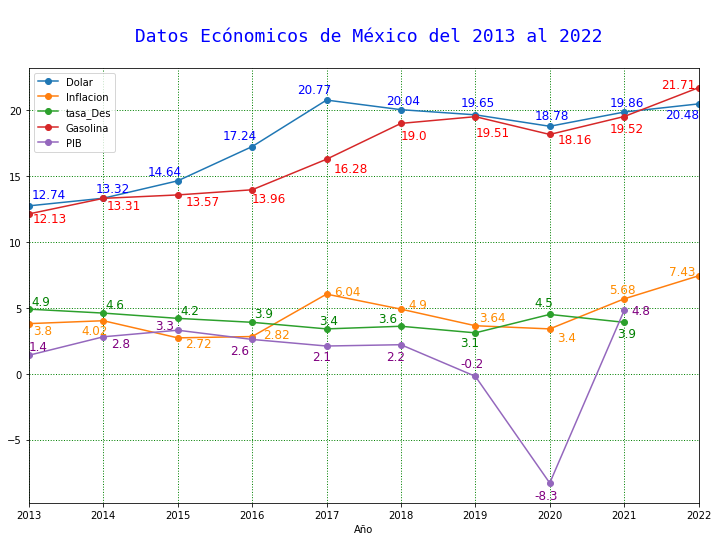

In [ ]:
#Parametros de la Gráfica
datos_economicos2.plot(kind="line", 
        x='Año',
        figsize=(12,8), marker = 'o')
plt.xlim(2013,2022)#Delimitadores de la gráfica
plt.grid(color='green', linestyle='dotted', linewidth=1)

#Personalización del titúlo
plt.title("\n Datos Ecónomicos de México del 2013 al 2022\n", 
          fontdict={'family': 'monospace', 
                    'color' : 'blue',
                    #'weight': 'Bold',
                    'size': 18},
          loc='center')



#Insertamos valores
plt.text(2013, 1.8,  datos_economicos.loc[0, 'PIB'] , fontsize=12, color='purple')
plt.text(2014.1, 2,  datos_economicos.loc[1, 'PIB'] , fontsize=12, color='purple')
plt.text(2014.7, 3.4,  datos_economicos.loc[2, 'PIB'] , fontsize=12, color='purple')
plt.text(2015.7, 1.5,  datos_economicos.loc[3, 'PIB'] , fontsize=12, color='purple')
plt.text(2016.8, 1,  datos_economicos.loc[4, 'PIB'] , fontsize=12, color='purple')
plt.text(2017.8, 1,  datos_economicos.loc[5, 'PIB'] , fontsize=12, color='purple')
plt.text(2018.8, .5,  datos_economicos.loc[6, 'PIB'] , fontsize=12, color='purple')
plt.text(2019.8, -9.5,  datos_economicos.loc[7, 'PIB'] , fontsize=12, color='purple')
plt.text(2021.1, 4.5,  datos_economicos.loc[8, 'PIB'] , fontsize=12, color='purple')

plt.text(2013.05, 3,  datos_economicos.loc[0, 'Inflacion'] , fontsize=12, color='darkorange')
plt.text(2013.7, 3,  datos_economicos.loc[1, 'Inflacion'] , fontsize=12, color='darkorange')
plt.text(2015.1, 2,  datos_economicos.loc[2 , 'Inflacion'] , fontsize=12, color='darkorange')
plt.text(2016.15, 2.7, datos_economicos.loc[3 , 'Inflacion'] , fontsize=12, color='darkorange')
plt.text(2017.1, 6,  datos_economicos.loc[4 , 'Inflacion'] , fontsize=12, color='darkorange')
plt.text(2018.1, 5,  datos_economicos.loc[ 5, 'Inflacion'] , fontsize=12, color='darkorange')
plt.text(2019.05, 4,  datos_economicos.loc[ 6, 'Inflacion'] , fontsize=12, color='darkorange')
plt.text(2020.1, 2.5,  datos_economicos.loc[ 7, 'Inflacion'] , fontsize=12, color='darkorange')
plt.text(2020.8, 6.1,  datos_economicos.loc[ 8, 'Inflacion'] , fontsize=12, color='darkorange')
plt.text(2021.6, 7.5,  datos_economicos.loc[ 9, 'Inflacion'] , fontsize=12, color='darkorange')

plt.text(2013.05, 11.5,  datos_economicos.loc[0, 'Gasolina'] , fontsize=12, color='Red')
plt.text(2014.05, 12.5,  datos_economicos.loc[ 1, 'Gasolina'] , fontsize=12, color='Red')
plt.text(2015.1, 12.8,  datos_economicos.loc[ 2, 'Gasolina'] , fontsize=12, color='Red')
plt.text(2016, 13,  datos_economicos.loc[ 3, 'Gasolina'] , fontsize=12, color='Red')
plt.text(2017.1, 15.3,  datos_economicos.loc[4 , 'Gasolina'] , fontsize=12, color='Red')
plt.text(2018, 17.8,  datos_economicos.loc[ 5, 'Gasolina'] , fontsize=12, color='Red')
plt.text(2019, 18,  datos_economicos.loc[ 6, 'Gasolina'] , fontsize=12, color='Red')
plt.text(2020.1, 17.5,  datos_economicos.loc[7 , 'Gasolina'] , fontsize=12, color='Red')
plt.text(2020.8, 18.3,  datos_economicos.loc[ 8, 'Gasolina'], fontsize=12, color='Red')
plt.text(2021.5, 21.7,  datos_economicos.loc[ 9, 'Gasolina'] , fontsize=12, color='Red')

plt.text(2013.03, 13.3,  datos_economicos.loc[0, 'Dolar'] , fontsize=12, color='Blue')
plt.text(2013.9, 13.8,  datos_economicos.loc[ 1, 'Dolar'] , fontsize=12, color='Blue')
plt.text(2014.6, 15.1,  datos_economicos.loc[ 2, 'Dolar'] , fontsize=12, color='Blue')
plt.text(2015.6, 17.8,  datos_economicos.loc[ 3, 'Dolar'] , fontsize=12, color='Blue')
plt.text(2016.6, 21.3,  datos_economicos.loc[ 4, 'Dolar'] , fontsize=12, color='Blue')
plt.text(2017.8, 20.5,  datos_economicos.loc[ 5, 'Dolar'] , fontsize=12, color='Blue')
plt.text(2018.8, 20.3,  datos_economicos.loc[ 6, 'Dolar'], fontsize=12, color='Blue')
plt.text(2019.8, 19.3,  datos_economicos.loc[ 7, 'Dolar'], fontsize=12, color='Blue')
plt.text(2020.8, 20.3,  datos_economicos.loc[ 8, 'Dolar'], fontsize=12, color='Blue')
plt.text(2021.55, 19.4,  datos_economicos.loc[ 9, 'Dolar'] , fontsize=12, color='Blue')

plt.text(2013.03, 5.2,  datos_economicos.loc[0, 'tasa_Des'] , fontsize=12, color='green')
plt.text(2014.03, 5,  datos_economicos.loc[ 1, 'tasa_Des'] , fontsize=12, color='green')
plt.text(2015.03, 4.5,  datos_economicos.loc[ 2, 'tasa_Des']  , fontsize=12, color='green')
plt.text(2016.03, 4.3,  datos_economicos.loc[ 3, 'tasa_Des']  , fontsize=12, color='green')
plt.text(2016.9, 3.8,  datos_economicos.loc[ 4, 'tasa_Des']  , fontsize=12, color='green')
plt.text(2017.7, 3.9,  datos_economicos.loc[ 5, 'tasa_Des']  , fontsize=12, color='green')
plt.text(2018.8, 2.1,  datos_economicos.loc[ 6, 'tasa_Des']  , fontsize=12, color='green')
plt.text(2019.8, 5.1,  datos_economicos.loc[ 7, 'tasa_Des']  , fontsize=12, color='green')
plt.text(2020.9, 2.8,  datos_economicos.loc[ 8, 'tasa_Des']  , fontsize=12, color='green')

plt.show()

##Creando la Gráfica de Salario Mínimo 

- Aplicamos los parametros de la gráfica
- Configuramos el título
- Insertamos valores
- Insertamos etiquetas
- Parámetros del fondo de color

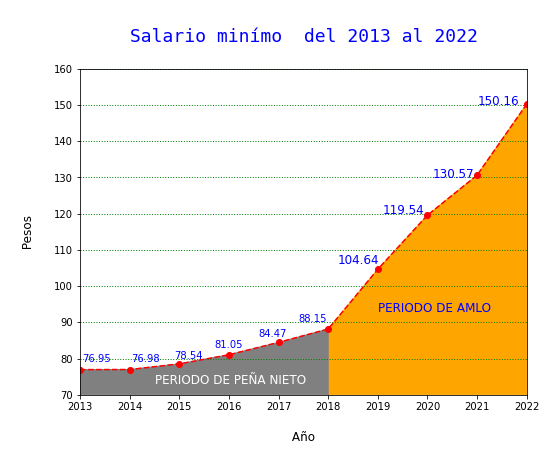

In [ ]:
#Parametros de la gráfica
plt.figure(figsize=(8,6))
plt.plot(datos_economicos['Año'],datos_economicos['Sal_min'], 'o--r') 
plt.xlabel('\n Año \n', size=12)
plt.ylabel('\n Pesos \n', size=12)
plt.grid(axis='y',color='g', linestyle='dotted', linewidth=1)
plt.xlim(2013,2022)#Delimitadores de la gráfica
plt.ylim(70,160)#Delimitadores de la gráfica

#Personalización del título
plt.title("\n Salario minímo  del 2013 al 2022 \n", 
          fontdict={'family': 'monospace', 
                    'color' : 'blue',
                    'size': 18},
           loc='center')


#Insertamos valores
plt.text(2013.03, 79,  datos_economicos.loc[0,'Sal_min'] , fontsize=10, color='blue')
plt.text(2014.03, 79,  datos_economicos.loc[1,'Sal_min'] , fontsize=10, color='blue')
plt.text(2014.9, 80.05,  datos_economicos.loc[2,'Sal_min'] , fontsize=10, color='blue')
plt.text(2015.7, 83,  datos_economicos.loc[3,'Sal_min'] , fontsize=10, color='blue')
plt.text(2016.6, 86,  datos_economicos.loc[4,'Sal_min'] , fontsize=10, color='blue')
plt.text(2017.4, 90,  datos_economicos.loc[5,'Sal_min'] , fontsize=10, color='blue')
plt.text(2018.2, 106,  datos_economicos.loc[6,'Sal_min'] , fontsize=12, color='blue')
plt.text(2019.1, 120,  datos_economicos.loc[7,'Sal_min'] , fontsize=12, color='blue')
plt.text(2020.1, 130,  datos_economicos.loc[8,'Sal_min'] , fontsize=12, color='blue')
plt.text(2021.01, 150,  datos_economicos.loc[9,'Sal_min'] , fontsize=12, color='blue')

#Insertamos etiquetas
plt.text(2019, 93,  'PERIODO DE AMLO' , fontsize=12, color='blue')
plt.text(2014.5, 73,  'PERIODO DE PEÑA NIETO' , fontsize=12, color='white')

#Parámetros de fondos de color
x = [2018, 2018,2019, 2020, 2021,2022, 2022]
y = [70,88.15, 104.64, 119.54, 130.57, 150.16, 70 ]
plt.fill(x,y, color='ORANGE')

#Parámetros de fondos de color
a = [2013, 2013,  2014,   2015, 2016,  2017, 2018, 2018]
b = [ 70, 76.95,  76.98, 78.54, 81.05, 84.47, 88.15, 70 ]
plt.fill(a,b, color='GREY')

plt.show()

##Creando grafica de heatmap para observar la correlación entre las partidas de nuestro Dataset

- Configuramos nuestra gráfica
- Insertamos el dataset en nuestro metódo
- Generamos la gráfica heatmap para observar las correlaciones.

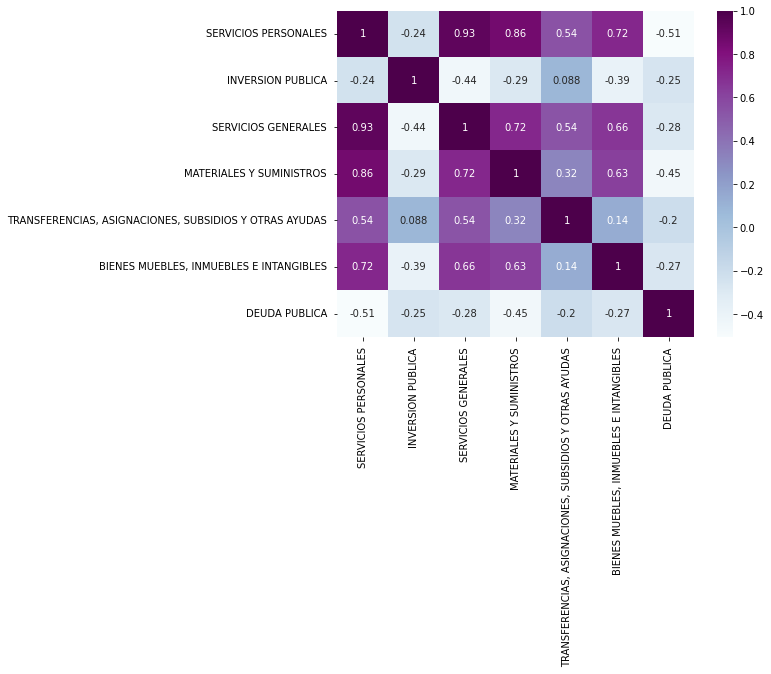

In [ ]:
#Definimos tamaño del heatmap
plt.figure(figsize =(8,6 ))

#Insertamosnutro datasetne el metódo .corr()
sns.heatmap(partidas.corr(), annot=True, cmap='BuPu')
plt.show()

##Creando heatmap para saber si hay correlaciones con nuestro set de datos económicos

- Creamos una lista del dataset que vamos a usar
- Eliminamos las variables que no vamos a usar de nuestra lista
- Configuramos nuestra gráfica
- Insertamos el dataset en nuestro metódo

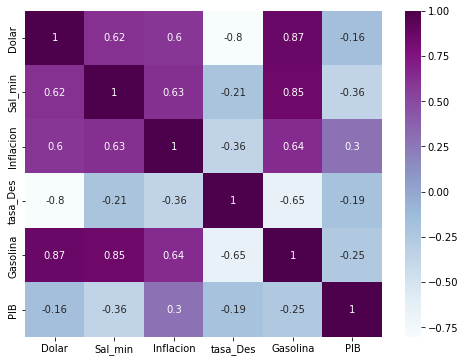

In [ ]:
#Creamos una lista del datset
datos_corr = list(datos_economicos)

#Quitamos la variable que no vamos a necesitar
datos_corr.remove('Año')

#Cofiguramos el tamaño de la gráfica
plt.figure(figsize =(8,6 ))

#Insertamos el dataset en nuestro metodo .corr() y gráficamos
sns.heatmap(datos_economicos[datos_corr].corr(), annot=True, cmap='BuPu')
plt.show()